In [12]:
#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
#
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
#

In [13]:
df=pd.read_excel(r'Hotel Reservations.xlsx')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [14]:
df.drop(columns=['Booking_ID'],inplace=True)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [15]:
# check nans and infs
numeric = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'required_car_parking_space',
    'lead_time',
    'arrival_year',
    'arrival_month',
    'arrival_date',
    'repeated_guest',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'avg_price_per_room',
    'no_of_special_requests'
           ]
categorical = [
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type',
    'booking_status'
]
continuous = ['lead_time','avg_price_per_room']
discrete = [var for var in numeric if var not in continuous]
for col in numeric:
    print(f"{col} nan values: {np.isnan(df[col]).sum()}")
    print(f"{col} inf values: {np.isinf(df[col]).sum()}")

no_of_adults nan values: 0
no_of_adults inf values: 0
no_of_children nan values: 0
no_of_children inf values: 0
no_of_weekend_nights nan values: 0
no_of_weekend_nights inf values: 0
no_of_week_nights nan values: 0
no_of_week_nights inf values: 0
required_car_parking_space nan values: 0
required_car_parking_space inf values: 0
lead_time nan values: 0
lead_time inf values: 0
arrival_year nan values: 0
arrival_year inf values: 0
arrival_month nan values: 0
arrival_month inf values: 0
arrival_date nan values: 0
arrival_date inf values: 0
repeated_guest nan values: 0
repeated_guest inf values: 0
no_of_previous_cancellations nan values: 0
no_of_previous_cancellations inf values: 0
no_of_previous_bookings_not_canceled nan values: 0
no_of_previous_bookings_not_canceled inf values: 0
avg_price_per_room nan values: 0
avg_price_per_room inf values: 0
no_of_special_requests nan values: 0
no_of_special_requests inf values: 0


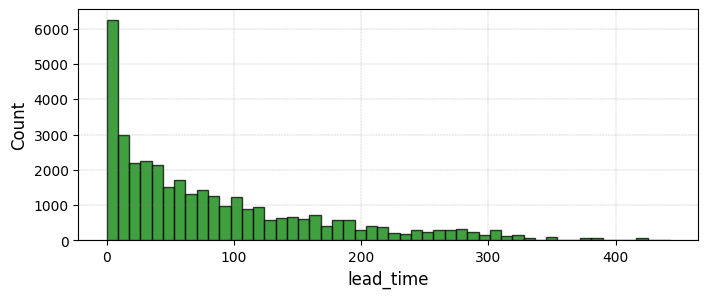

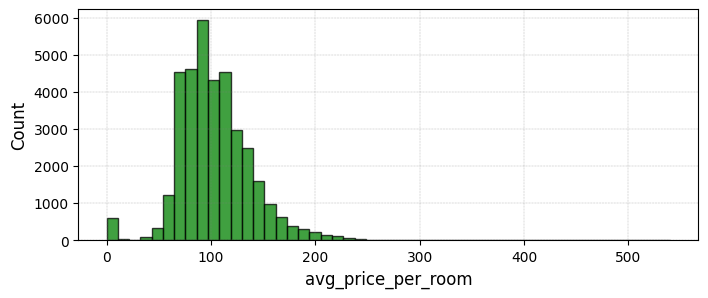

In [16]:
# continuous
for var in continuous:
    plt.figure(figsize=(8,3))
    plt.hist(df[var],50,facecolor='g', alpha=0.75, histtype='bar', ec='black')
    plt.ylabel('Count',fontsize=12)
    plt.xlabel(var,fontsize=12)
    plt.grid(True, color = "grey", linewidth = "0.2", linestyle = "-.")
    plt.show()

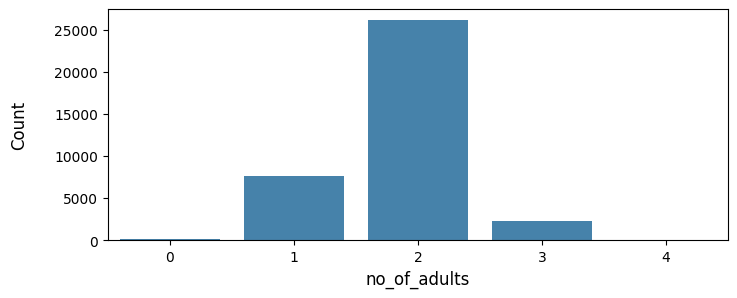

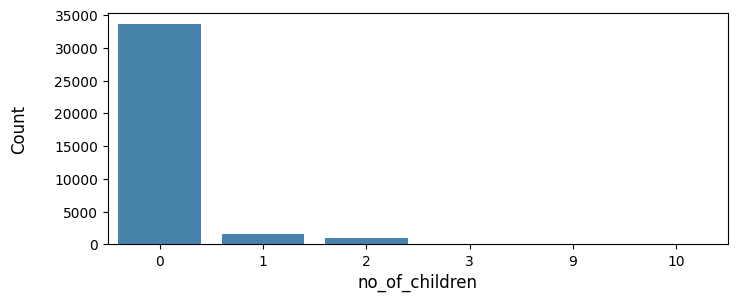

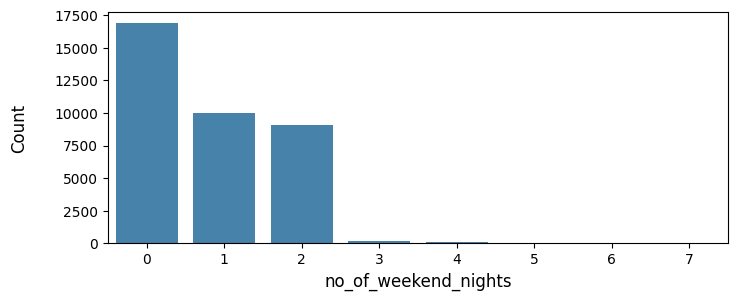

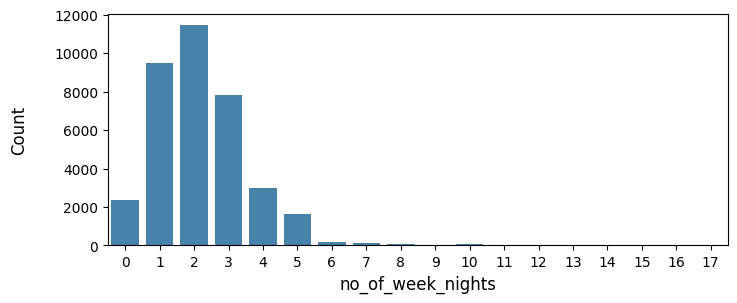

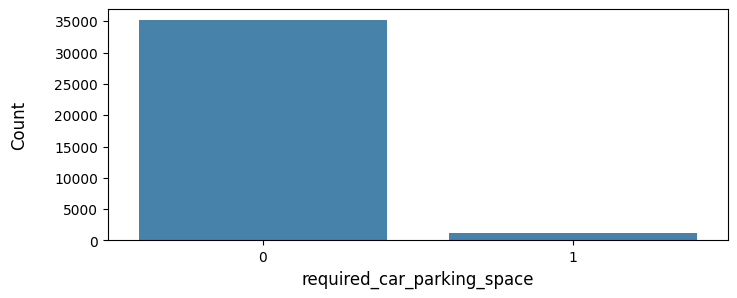

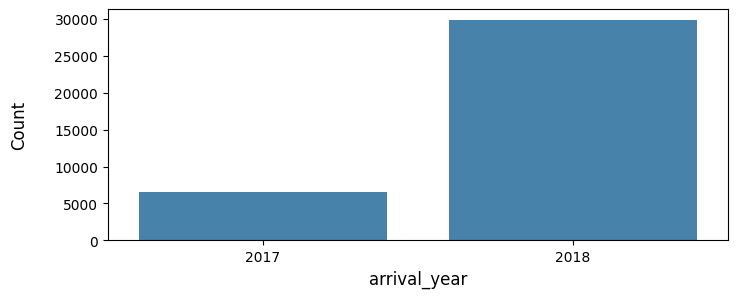

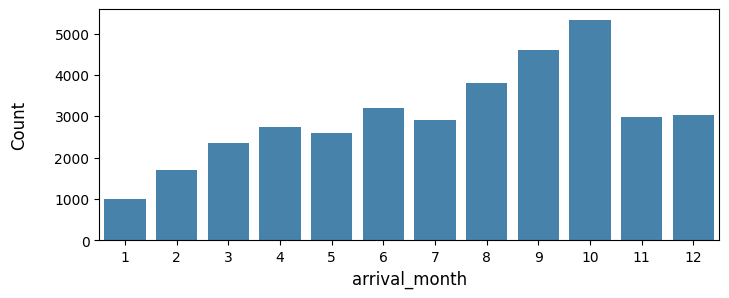

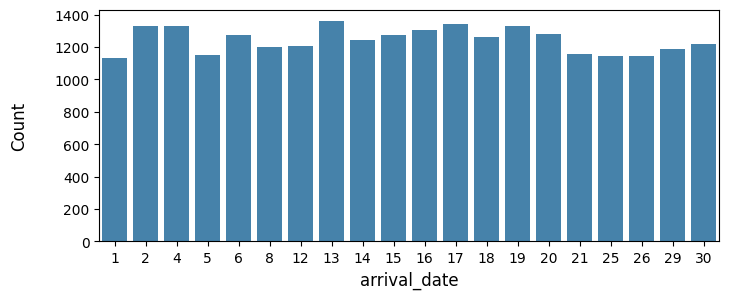

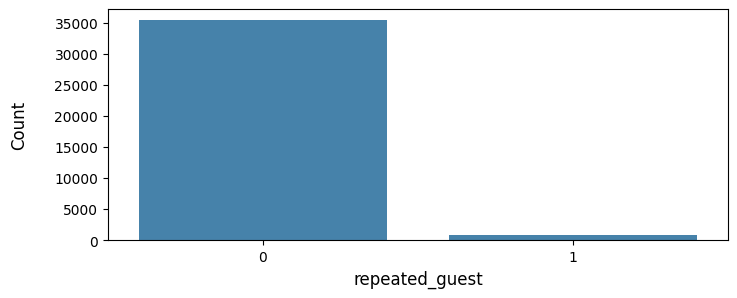

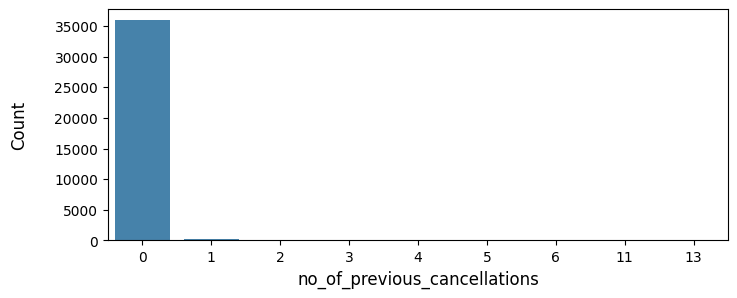

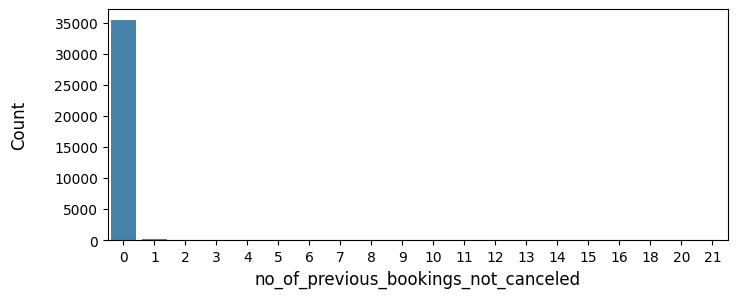

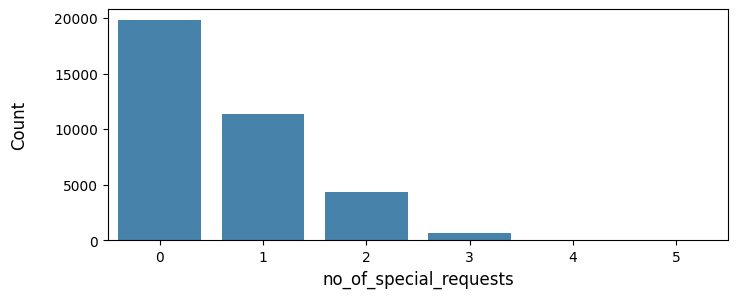

In [17]:
# discrete
for var in discrete:
    plt.figure(figsize=(8,3))
    count = df[var].value_counts()
    count.index=count.index.astype(int)
    sns.barplot(count[0:20],alpha=0.9)
    plt.ylabel('Count\n',fontsize=12)
    plt.xlabel(var,fontsize=12)
    plt.show()

In [18]:
# data adjustments:
df['no_of_week_nights'] = np.where(df['no_of_week_nights']>5,5,df['no_of_week_nights'])
df['no_of_weekend_nights'] = np.where(df['no_of_weekend_nights']>2,2,df['no_of_weekend_nights'])

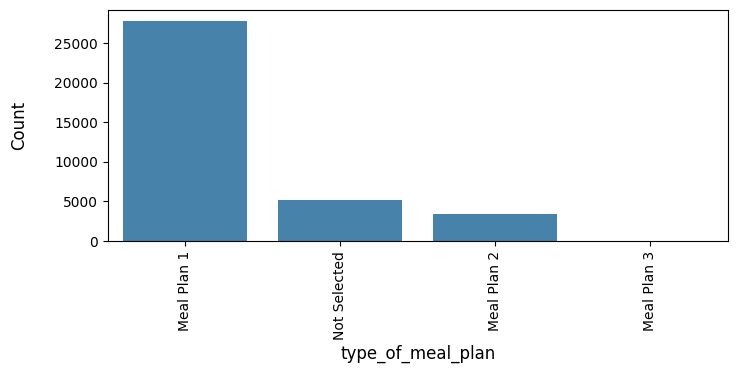

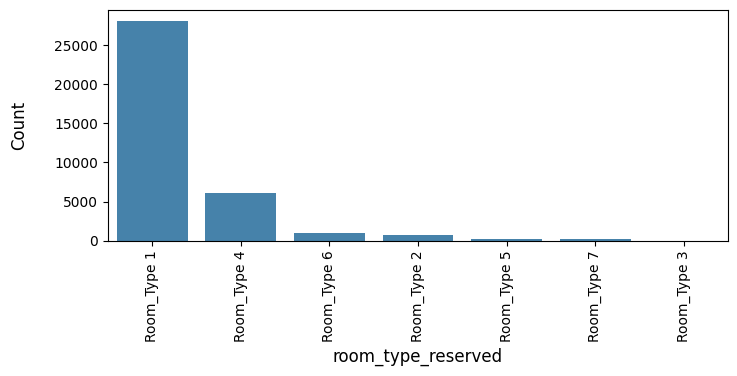

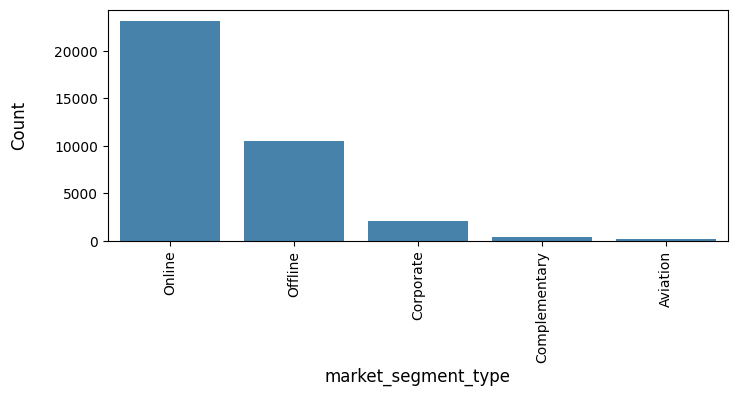

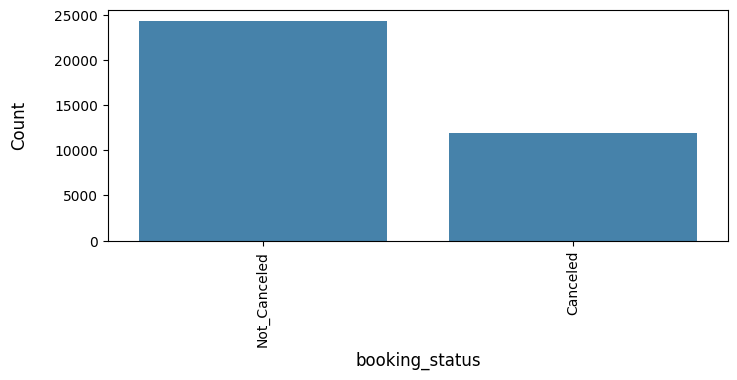

In [19]:
# categorical
for var in categorical:
    plt.figure(figsize=(8,3))
    count = df[var].value_counts()
    sns.barplot(count[0:20],alpha=0.9)
    plt.ylabel('Count\n',fontsize=12)
    plt.xlabel(var,fontsize=12)
    plt.xticks(rotation=90)  # Adjust the angle as needed
    plt.show()

In [20]:
# label encoding
label_encoder = LabelEncoder()
for col in categorical:
    df[col] = label_encoder.fit_transform(df[col])

In [21]:
# Multicollinearity test
# Variance Inflation Factor (VIF)
# VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. 
# A high VIF indicates that a predictor variable is highly collinear with the other predictor variables.
vif_data = df.copy()
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Print the VIF values
print(vif)

                                Variable        VIF
0                           no_of_adults  17.704465
1                         no_of_children   1.341136
2                   no_of_weekend_nights   2.009167
3                      no_of_week_nights   4.301181
4                      type_of_meal_plan   1.424461
5             required_car_parking_space   1.066602
6                     room_type_reserved   1.919624
7                              lead_time   2.772927
8                           arrival_year  65.925099
9                          arrival_month   7.213243
10                          arrival_date   4.207061
11                   market_segment_type  45.166854
12                        repeated_guest   1.697995
13          no_of_previous_cancellations   1.347609
14  no_of_previous_bookings_not_canceled   1.612467
15                    avg_price_per_room  15.880756
16                no_of_special_requests   2.124631
17                        booking_status   4.438752


In [22]:
# data adjustments:
df.drop(columns=['arrival_year'],inplace=True)

In [23]:
# train/test split
X = df.loc[:, df.columns != 'booking_status']
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Evaluate precision
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Evaluate recall
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# Get probability predictions for AUC calculation
y_probs = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

Accuracy: 0.8920744314266024
Precision: 0.9031809145129225
Recall: 0.9388303368464559
AUC: 0.9555646280428471
